Data does not contain any text and column names looks correct so no need to deal with thoose.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv("creditcard.csv")
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


No empty rows

In [3]:
print(df.info())
p = df.isnull().sum()
p = p.sort_values()
print(p)

<class 'pandas.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     284807 non-nu

# Exploratory statistical analysis

In [4]:
print(df[['Time', 'Amount', 'Class']].describe())

                Time         Amount          Class
count  284807.000000  284807.000000  284807.000000
mean    94813.859575      88.349619       0.001727
std     47488.145955     250.120109       0.041527
min         0.000000       0.000000       0.000000
25%     54201.500000       5.600000       0.000000
50%     84692.000000      22.000000       0.000000
75%    139320.500000      77.165000       0.000000
max    172792.000000   25691.160000       1.000000


## Class based

Data is pretty unbalanced as we can see

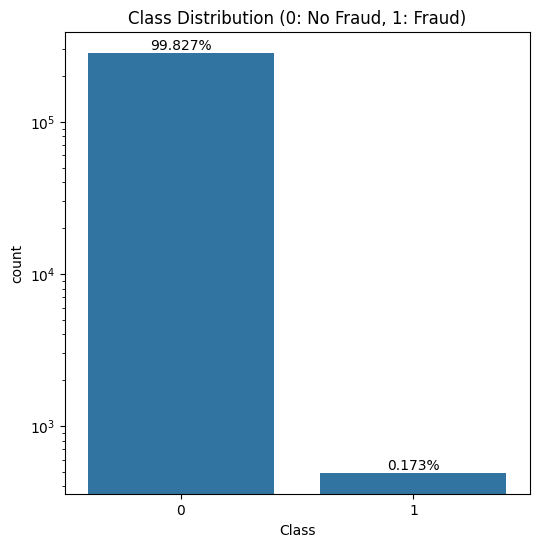

In [5]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: No Fraud, 1: Fraud)')
plt.yscale('log') # Log scale to see better
# calculation of percentages
total = len(df)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
plt.show()

## Time based

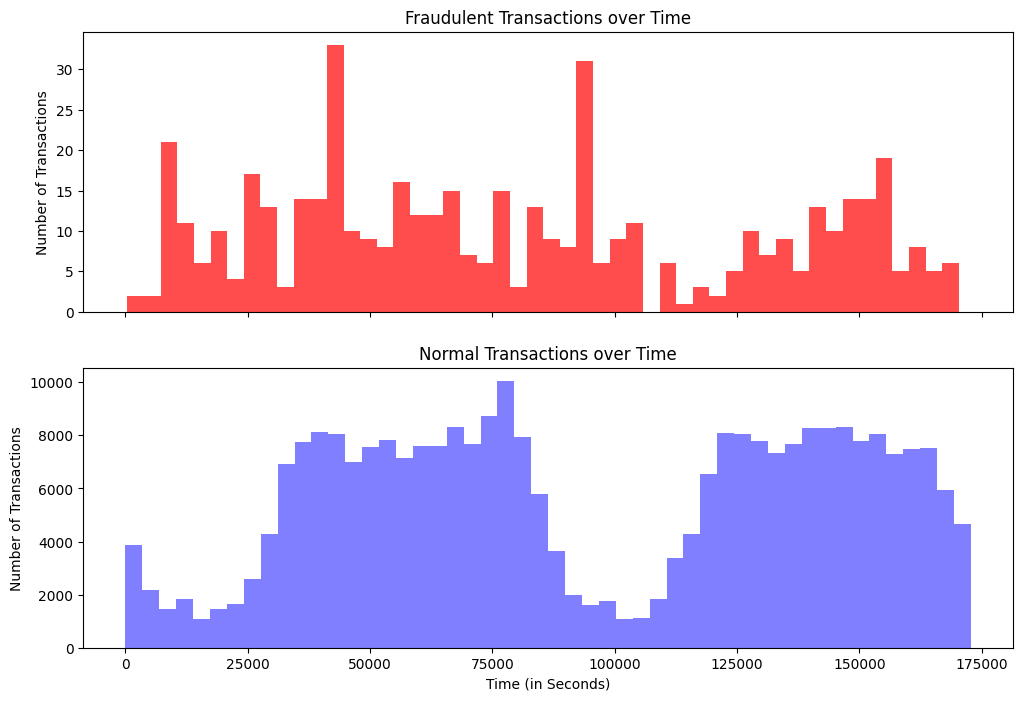

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

ax1.hist(df.Time[df.Class == 1], bins=50, color='red', alpha=0.7)
ax1.set_title('Fraudulent Transactions over Time')
ax1.set_ylabel('Number of Transactions')

ax2.hist(df.Time[df.Class == 0], bins=50, color='blue', alpha=0.5)
ax2.set_title('Normal Transactions over Time')
ax2.set_xlabel('Time (in Seconds)')
ax2.set_ylabel('Number of Transactions')
plt.show()

## Amount based

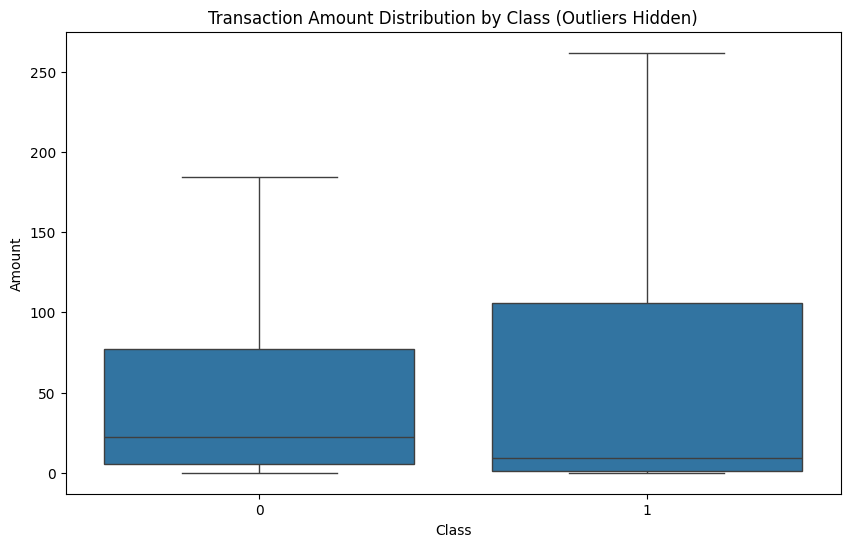

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df, showfliers=False) # Hiding extreme outliers for clarity
plt.title('Transaction Amount Distribution by Class (Outliers Hidden)')
plt.show()

## Correlation

this chart actually not that usefull in this case because most of correlations close to 0

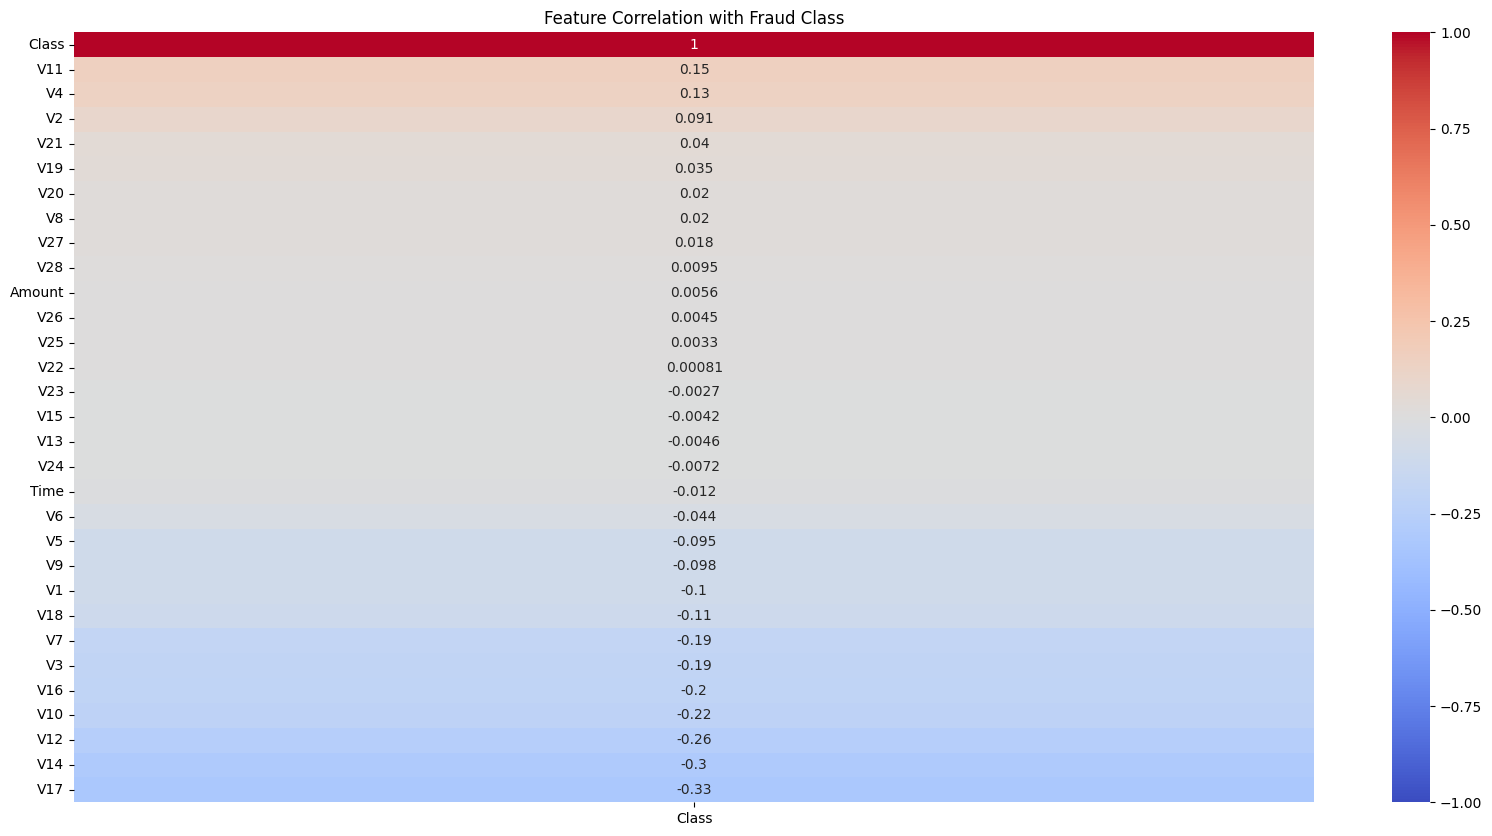

In [8]:
plt.figure(figsize=(20, 10))
# Calculate correlation
corr = df.corr()
# We focus on correlations with 'Class' specifically
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation with Fraud Class')
plt.show()

we take the most correlated or negatively correlated categories

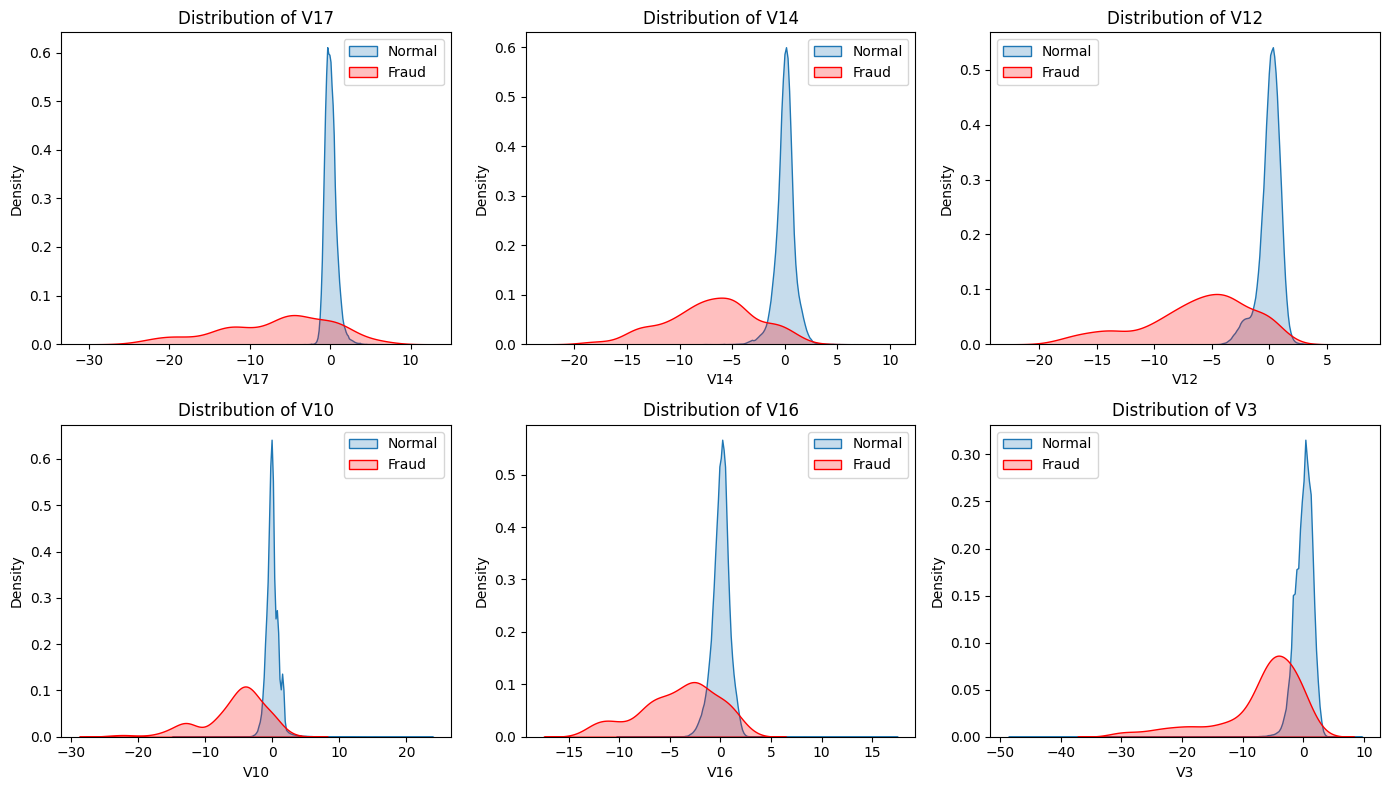

In [9]:
correlations = df.corrwith(df['Class']).abs()
features_to_check = correlations.drop('Class').nlargest(6).index.tolist()

plt.figure(figsize=(14, 8))
for i, col in enumerate(features_to_check, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(df[df['Class'] == 0][col], label='Normal', fill=True)
    sns.kdeplot(df[df['Class'] == 1][col], label='Fraud', fill=True, color='red')
    plt.title(f'Distribution of {col}')
    plt.legend()
plt.tight_layout()
plt.show()

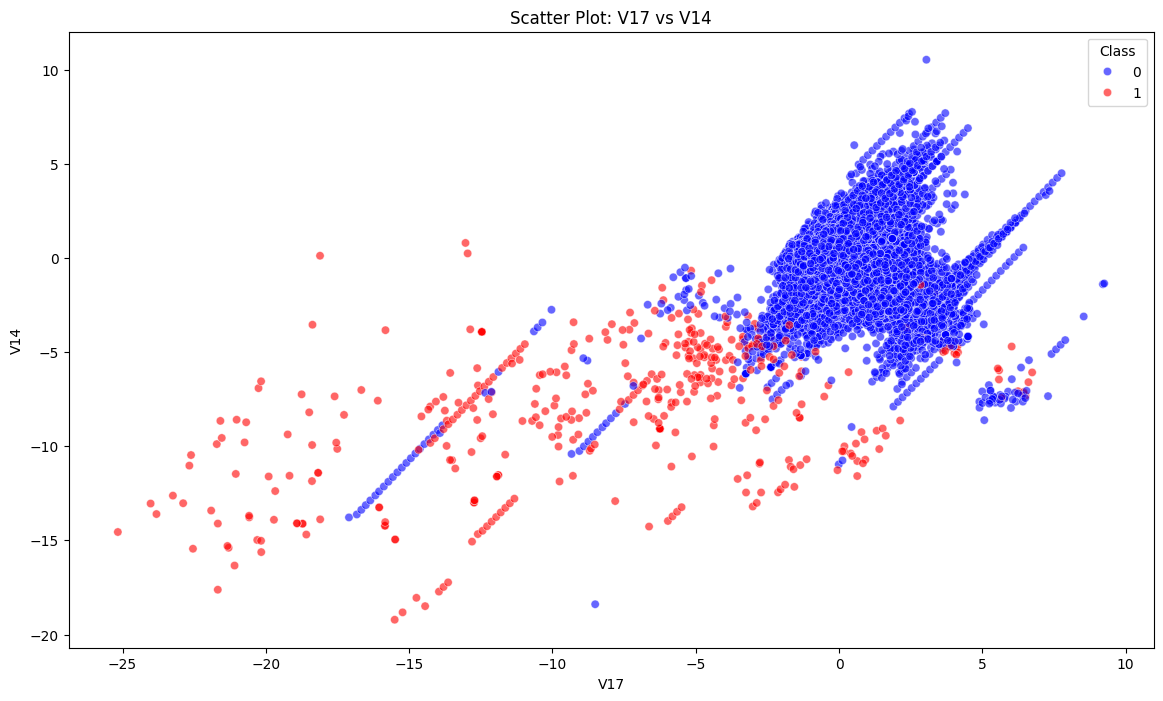

In [10]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='V17', y='V14', hue='Class', data=df, alpha=0.6, palette={0:'blue', 1:'red'})
plt.title('Scatter Plot: V17 vs V14')
plt.show()

Feature importances with random forest algoritm

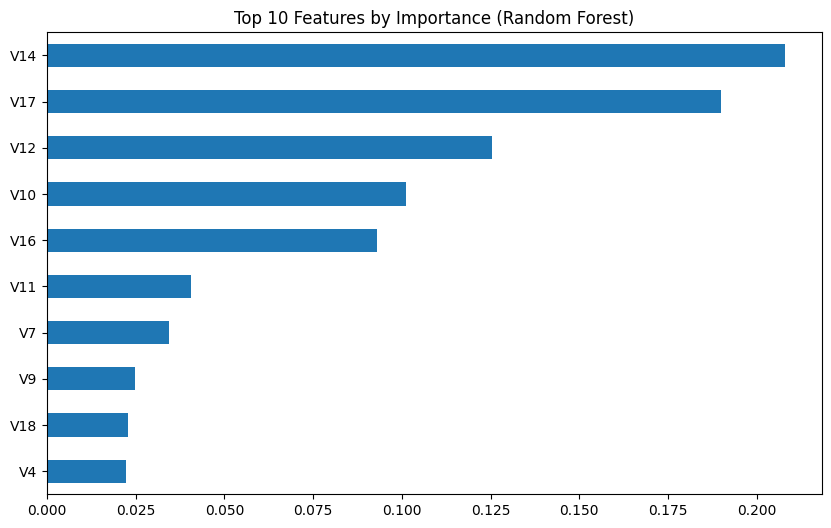

In [11]:
X = df.drop('Class', axis=1)
y = df['Class']

# Initialize a small model just for importance extraction
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42, n_jobs=-1)
rf.fit(X, y)

# Plotting importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
importances.plot(kind='barh', title='Top 10 Features by Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

## Time of the dy based analysis
One thing is pretty surprising, i would expect that frauds to concentrate in the night hours.

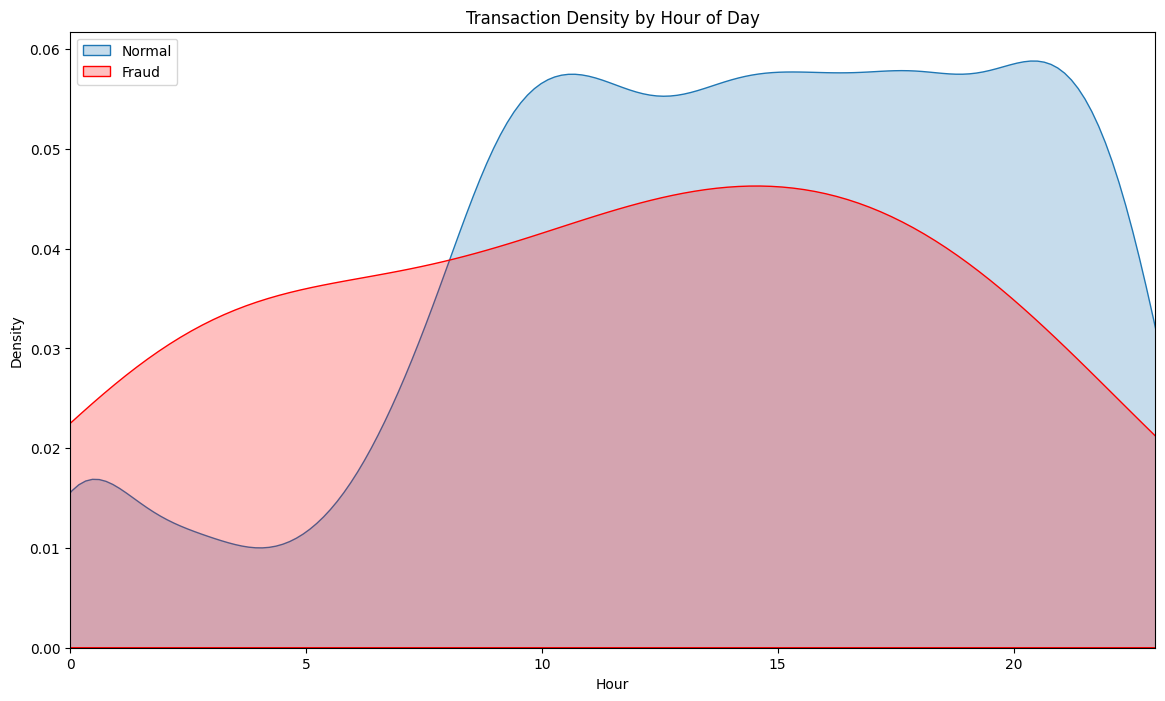

In [12]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600) % 24)

plt.figure(figsize=(14, 8))

# Plot the distribution of Fraud vs Normal transactions across hours
sns.kdeplot(df[df['Class'] == 0]['Hour'], label='Normal', fill=True, bw_adjust=2)
sns.kdeplot(df[df['Class'] == 1]['Hour'], label='Fraud', fill=True, color='red', bw_adjust=2)

plt.title('Transaction Density by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Density')
plt.legend()
plt.xlim(0, 23)
plt.show()

# Subsets against each other

This is to see if we can catch any clustering

Top 3 Features selected for Pairplot: ['V17', 'V14', 'V12']


<Figure size 1400x800 with 0 Axes>

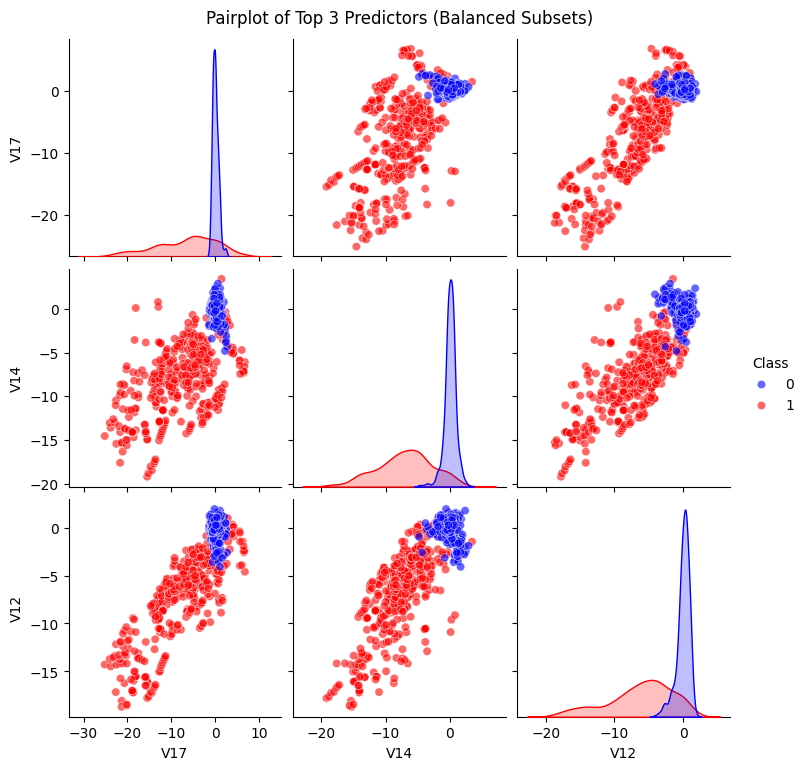

In [13]:
# Pairplot of Top 3 feature against each other
top_features = correlations.drop('Class').nlargest(3).index.tolist()
print(f"Top 3 Features selected for Pairplot: {top_features}")

# 2. Create a balanced subset for visualization
fraud_df = df[df['Class'] == 1]
normal_df = df[df['Class'] == 0].sample(n=len(fraud_df), random_state=42)
plot_df = pd.concat([fraud_df, normal_df])

# 3. Create the Pairplot
plt.figure(figsize=(14, 8))
pp = sns.pairplot(plot_df, 
                  vars=top_features, 
                  hue='Class', 
                  palette={0: 'blue', 1: 'red'},
                  kind='scatter',
                  diag_kind='kde', # Shows density on the diagonal
                  plot_kws={'alpha': 0.6})

pp.fig.suptitle('Pairplot of Top 3 Predictors (Balanced Subsets)', y=1.02)
plt.show()

# Preprocessing

We already checked for missing data shortly after we imported our dataset so we do not need to do again.

For duplicate data

In [35]:
befor_dup = len(df)
df_clean = df.drop_duplicates()
after_dup = len(df_clean)
print(f"Number of duplicates: {befor_dup - after_dup}")

Number of duplicates: 1081


In [36]:
scaler = RobustScaler()

df_clean['scaled_amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['scaled_time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))
df_clean['log_amount'] = np.log(df_clean['scaled_amount'] + 1e-9 + abs(df_clean['scaled_amount'].min()))

# Drop the old unscaled columns
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

I prefer to not remove the outlier because it might be part of the data

In [45]:
print(f"Outlier Detection Target: Automatically selected '{top_features}'.")

# Quartiles
Q1 = df_clean[top_features].quantile(0.25)
Q3 = df_clean[top_features].quantile(0.75)
IQR = Q3 - Q1

# Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_count = ((df_clean[top_features] < lower_bound) | (df_clean[top_features] > upper_bound)).sum()

for col, count in outlier_count.items():
    print(f" - {col}: {count} outliers detected")

Outlier Detection Target: Automatically selected '['V17', 'V14', 'V12']'.
 - V17: 7353 outliers detected
 - V14: 14060 outliers detected
 - V12: 15282 outliers detected
